# Introduction to data analysis - Spring 2023
## Mini-Project

Lior Ben Sidi
Yarin Katan

### Submission guidelines:
● Submission deadline: 08/08/23 at 23:55.
○ The submission box in Moodle will close 48 hours after this deadline. To avoid
penalties for late submissions (as stated in the syllabus), submit by this deadline.
● Submission in pairs only (unless special permission is given by the head TA)
● Submission must include (at least) two files (not a single zip):
○ One jupyter notebook with your answers to parts 1, 2, 3, and 4 with both markdown
and code cells. Markdown cells should contain brief explanations of your analyses.
No need to elaborate in this file - you will do that in the PDF - but it should be clear
enough that we know which questions the code relates to and what it does. Code
cells must enable complete reproduction of all your results. Your code should be
clearly documented.
○ One PDF of exported content of your jupyter notebook. The PDF has to contain your
outputs, similar to homework submission.
○ One PDF file with your answers to part 5.
○ You should merge the exported PDF and the PDF for part 5. You may use online free
tools to do that, like: https://tools.pdf24.org/en/merge-pdf
○ As listed in the syllabus, if you use generative AI tools, you must also submit a (third)
docx file with details on your usage. Refer to the syllabus for details.
● File names must be in the following format: final_project_ID1_ID2.pdf,
final_project_ID1_ID2.ipynb .
● You must adhere to the syllabus when you prepare and submit your work. Any deviation from
the syllabus and/or guidelines herein will result in point deduction.
● You can write in either Hebrew or English, but it’s better to use the language you are more
comfortable with.

### Instructions
For the course mini-project, you will work with a dataset of your choice (from a set of possible
datasets) to answer questions you are curious about.

### IMPORTANT NOTES, please read carefully:
● In all of the following analyses, you will likely need to make some choices regarding what
variables to include, whether to do some pre-processing (e.g., addressing missing values,
generating new variables), what techniques to use in the analysis, etc. Clearly state each
decision you made, explain why you made it and what might have been alternative choices.
● You can earn up to 15 bonus points for your project (can reach a maximum of 115 points) if
you do a particularly thoughtful analysis, involving either an additional (unprovided, but
somewhat complimentary) dataset, or analysis of a complex data type (e.g., text). Note,
simply using complex data or an additional data source does not guarantee a bonus. If you
ask an interesting question and think of an original way to address it, that will get you the
extra points.

### Part 1: Choose a dataset

#### Choose one of the following datasets:
● Adult Income dataset:
https://www.kaggle.com/datasets/wenruliu/adult-income-dataset
● US Estimated Crimes dataset:
https://www.kaggle.com/datasets/tunguz/us-estimated-crimes
● Diabetes Prediction dataset:
https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset
● US Married Couples in 1976 dataset:
https://www.kaggle.com/datasets/utkarshx27/labor-supply-data
● World Air Quality Index dataset:
https://www.kaggle.com/datasets/adityaramachandran27/world-air-quality-index-by-city-and-c
oordinates
● Mobile Phones dataset:
https://www.kaggle.com/datasets/artempozdniakov/ukrainian-market-mobile-phones-data
● Students Exam Scores dataset (Only use the version in the file named
‘Expanded_data_with_more_features.csv’, not the version in the other file):
https://www.kaggle.com/datasets/desalegngeb/students-exam-scores?select=Expanded_dat
a_with_more_features.csv

Once you have chosen your dataset:
1) State which dataset you chose.
2) Provide a brief (2-4 sentences) description of the dataset. What is this dataset about?
3) List the features in the dataset and their types.
4) List the number of records in the dataset.

In [81]:
#Import libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('tableau-colorblind10')
import seaborn as sns
sns.set_palette("viridis")
from tqdm import tqdm

In [82]:
df_diabetes = pd.read_csv('diabetes_prediction_dataset.csv')
df_diabetes

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


#### Question 1

We chose the "Diabetes prediction dataset".

#### Question 2

The Diabetes prediction dataset is a comprehensive collection of medical data from patients,
offering valuable insights into diabetes prediction.
It encompasses factors like age, gender, BMI, hypertension, heart disease,
smoking history, HbA1c level, and blood glucose level.

#### Question 3

According to the data frame the List of features in the dataset and their types are:
1. gender - Categorical('Female', 'Male', 'Other')
2. age - Numeric continuous(float)
3. hypertension - Boolean(binary)
4. heart_disease - Boolean(binary)
5. smoking_history - Categorical
6. bmi - Numeric continuous(float)
7. HbA1c_level - Numeric continuous(float)
8. blood_glucose_level - Numeric discrete (integer) #Ask about the type
9. diabetes - Boolean(binary)

#### Question 4

In [83]:
print(f'the number of records in the dataset are: {df_diabetes.shape[0]}')

the number of records in the dataset are: 100000


### Part 2: Exploratory data analysis

In this part, you will do an initial exploration of the dataset you chose.
This part should serve the next parts.
That is, you should look at variables that can influence your analyses for parts (3) and (4).
Of course, you can (and probably should) also explore further, and/or use this as a way to motivate questions for parts (3) and (4).
You should explain why you are exploring the particular variables you
chose.

1. Show plots illustrating the distribution of at least 5 variables in your dataset.
Comment on anything interesting you observe.
2. Show plots illustrating bivariate relationships for at least 2 pairs of variables.
Explain what you observe (e.g., positive/negative correlation, no correlation, etc.).

In [84]:
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


#### Checks the distribution of all futures:

100%|██████████| 100000/100000 [00:02<00:00, 44900.13it/s][A


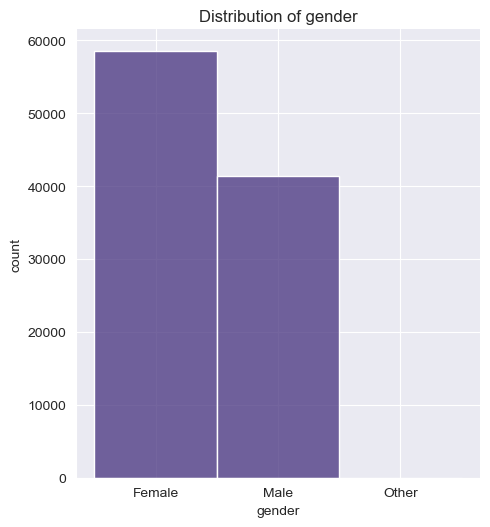

100%|██████████| 100000/100000 [00:01<00:00, 51629.53it/s][A


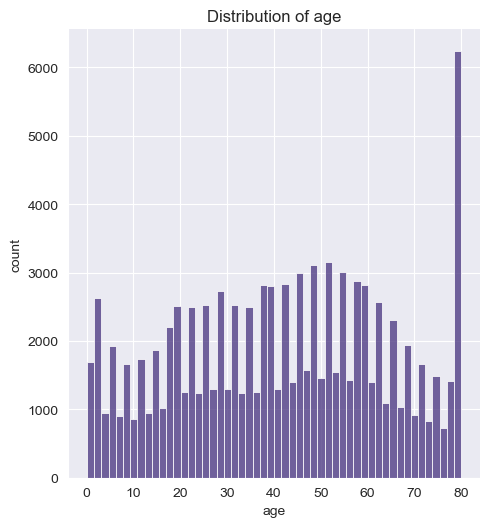

100%|██████████| 100000/100000 [00:01<00:00, 50504.24it/s][A


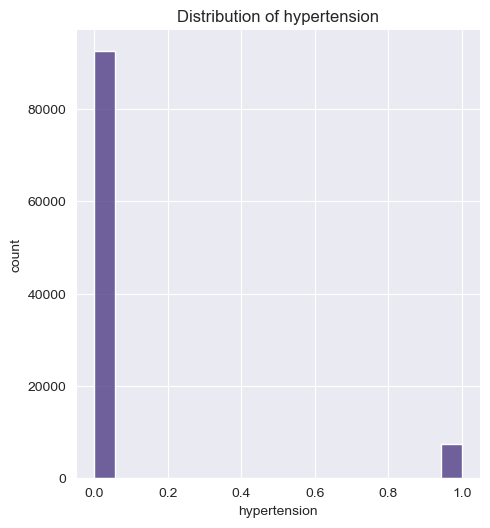

100%|██████████| 100000/100000 [00:01<00:00, 51625.21it/s][A


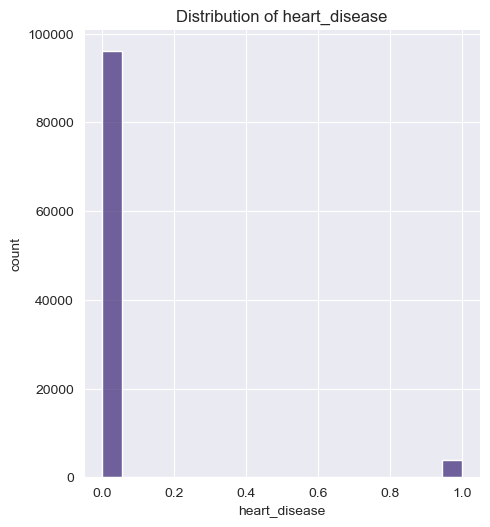

100%|██████████| 100000/100000 [00:01<00:00, 52124.74it/s][A


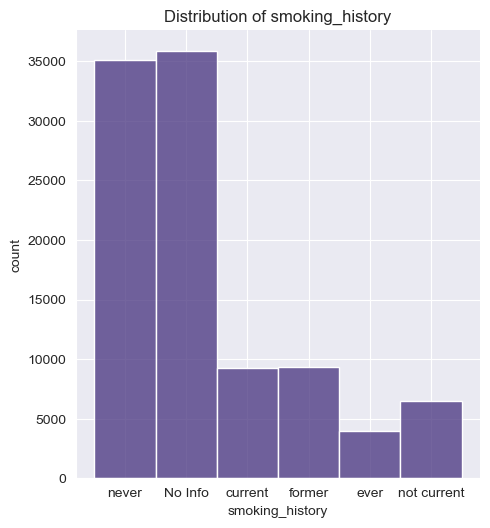

100%|██████████| 100000/100000 [00:01<00:00, 50072.23it/s][A


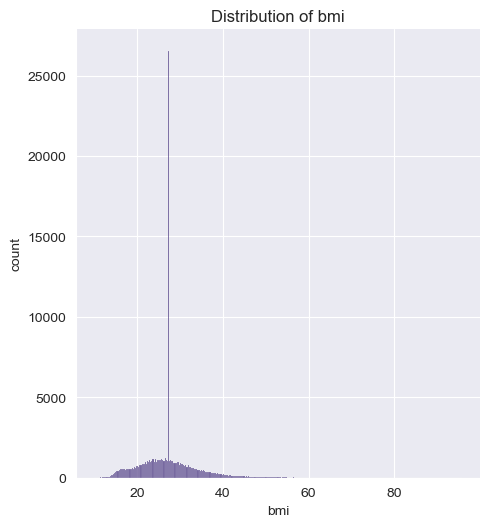

100%|██████████| 100000/100000 [00:02<00:00, 39921.21it/s][A


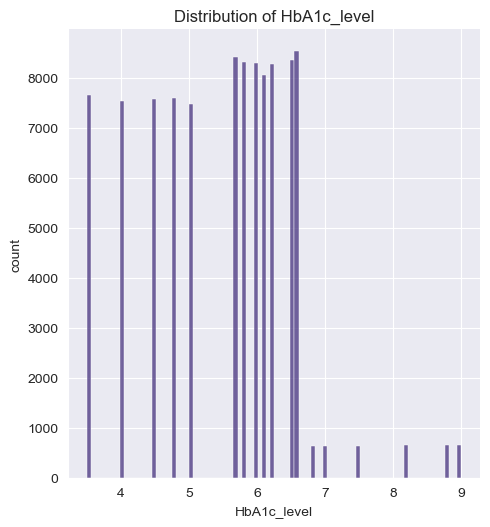

100%|██████████| 100000/100000 [00:01<00:00, 52292.32it/s][A


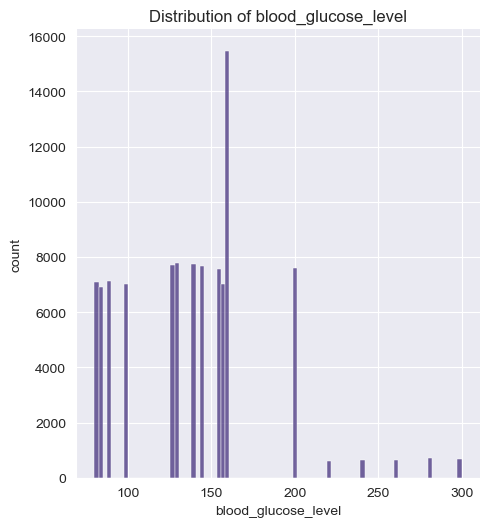

100%|██████████| 100000/100000 [00:01<00:00, 52390.16it/s][A


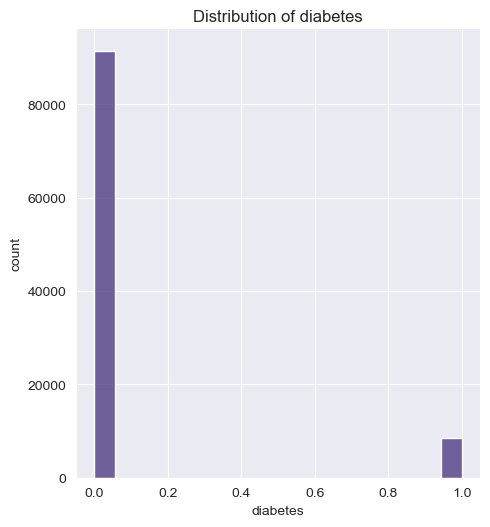

100%|██████████| 9/9 [00:28<00:00,  3.16s/it]


In [85]:
for fut in tqdm(df_diabetes.columns.unique()):
    arr_of_fut = []
    for i in tqdm(range(df_diabetes[fut].shape[0])):
        arr_of_fut.append(df_diabetes[fut][i])

    # Set the figure size
    # plt.figure(figsize=(13, 13))

    # Plot accidents for each type
    sns.displot(arr_of_fut, stat='count')

    plt.title(f'Distribution of {fut}')
    plt.xlabel(fut)
    plt.ylabel('count')

    plt.show()

#### Checks bivariate relationship:

  0%|          | 0/9 [00:00<?, ?it/s]

the correlation between age and hypertension is 0.2511711290744403


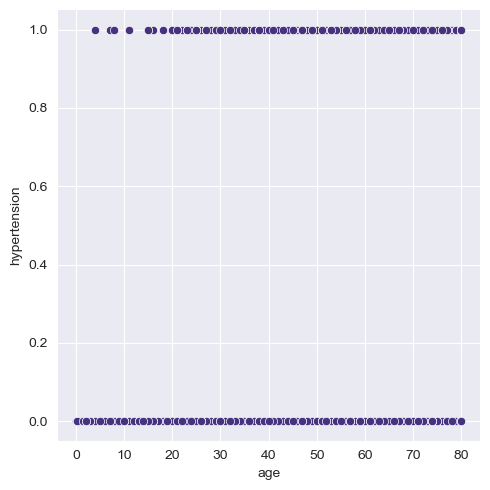

 33%|███▎      | 3/9 [00:00<00:01,  3.43it/s]

the correlation between age and heart_disease is 0.23335429063748273


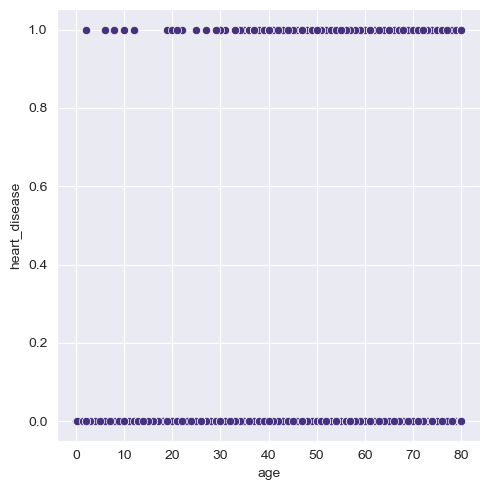

 44%|████▍     | 4/9 [00:01<00:02,  2.05it/s]

the correlation between age and bmi is 0.3373957761861745


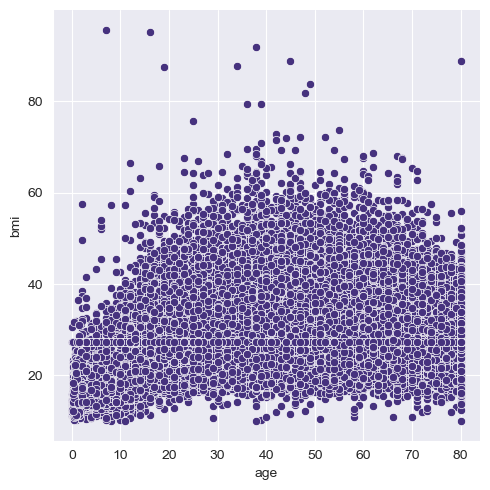

 67%|██████▋   | 6/9 [00:02<00:01,  2.17it/s]

the correlation between age and HbA1c_level is 0.10135366114510692


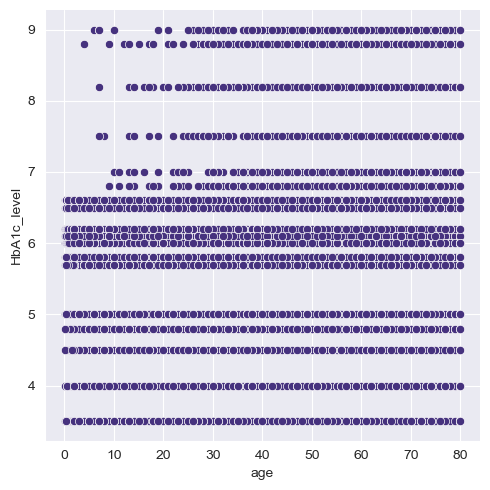

 78%|███████▊  | 7/9 [00:03<00:01,  1.74it/s]

the correlation between age and blood_glucose_level is 0.1106722675703809


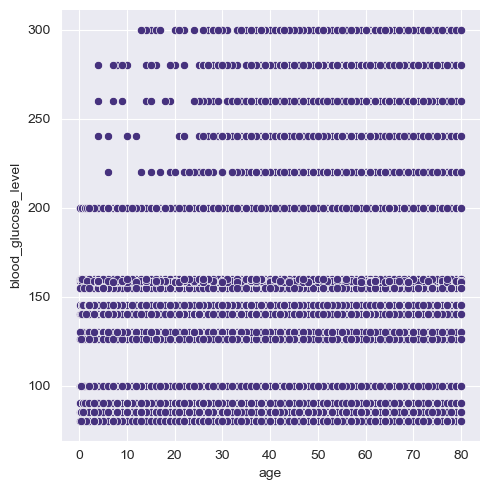

 89%|████████▉ | 8/9 [00:04<00:00,  1.51it/s]

the correlation between age and diabetes is 0.25800803335609646


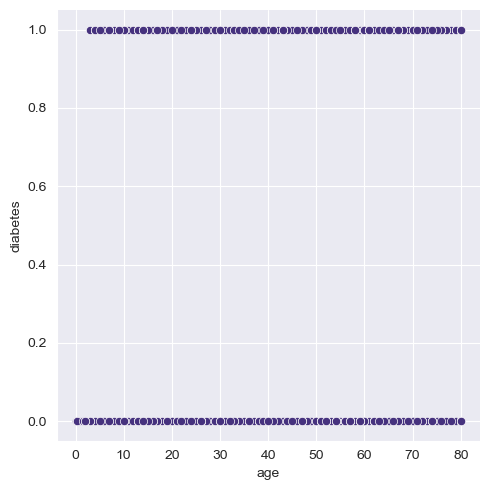

  0%|          | 0/9 [00:00<?, ?it/s]

the correlation between hypertension and age is 0.2511711290744403


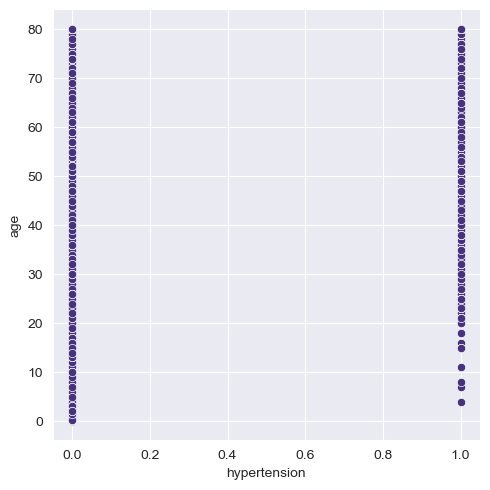

 22%|██▏       | 2/9 [00:00<00:03,  2.33it/s]

the correlation between hypertension and heart_disease is 0.1212616539895466


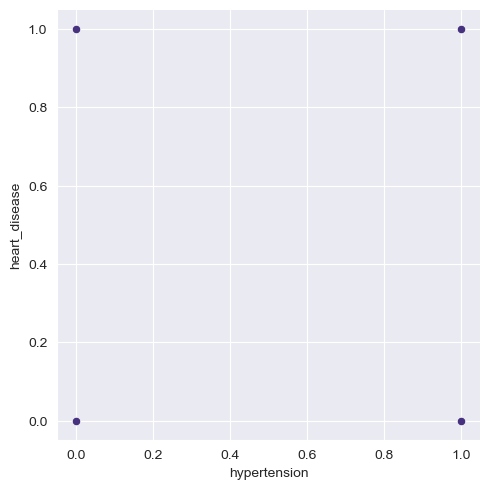

 44%|████▍     | 4/9 [00:01<00:02,  2.42it/s]

the correlation between hypertension and bmi is 0.14766567202391168


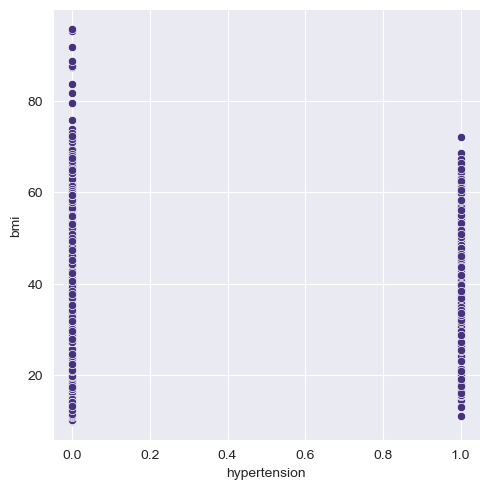

 67%|██████▋   | 6/9 [00:02<00:01,  2.42it/s]

the correlation between hypertension and HbA1c_level is 0.0809387824060567


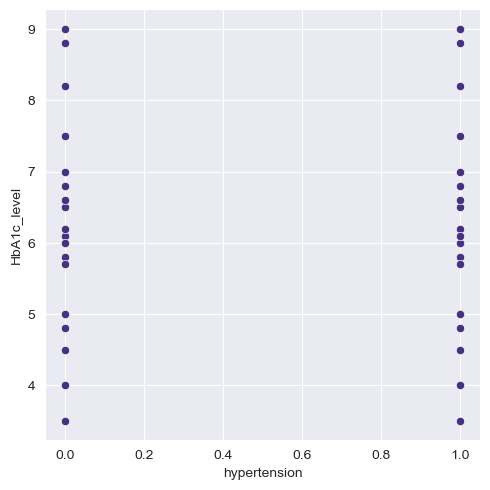

 78%|███████▊  | 7/9 [00:03<00:01,  1.71it/s]

the correlation between hypertension and blood_glucose_level is 0.0844289044696364


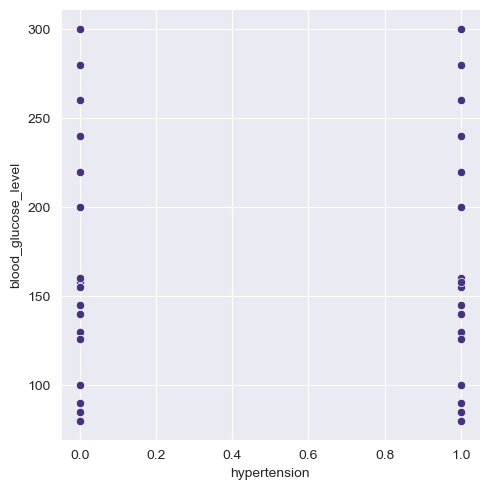

 89%|████████▉ | 8/9 [00:04<00:00,  1.53it/s]

the correlation between hypertension and diabetes is 0.1978232464080493


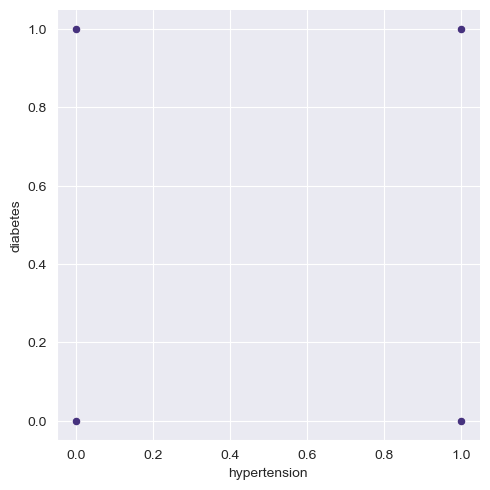

  0%|          | 0/9 [00:00<?, ?it/s]

the correlation between heart_disease and age is 0.23335429063748273


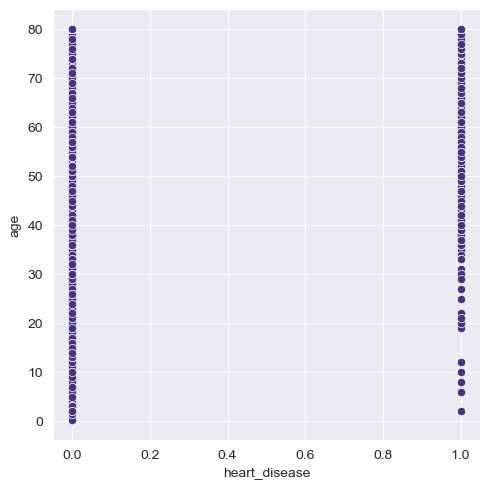

 22%|██▏       | 2/9 [00:00<00:03,  2.02it/s]

the correlation between heart_disease and hypertension is 0.12126165398954658


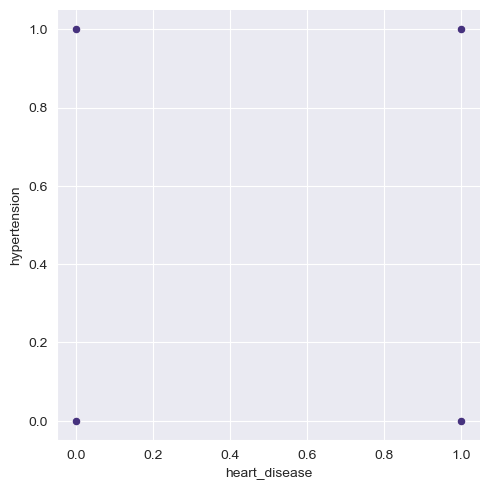

 33%|███▎      | 3/9 [00:01<00:03,  1.52it/s]

the correlation between heart_disease and bmi is 0.06119781855705118


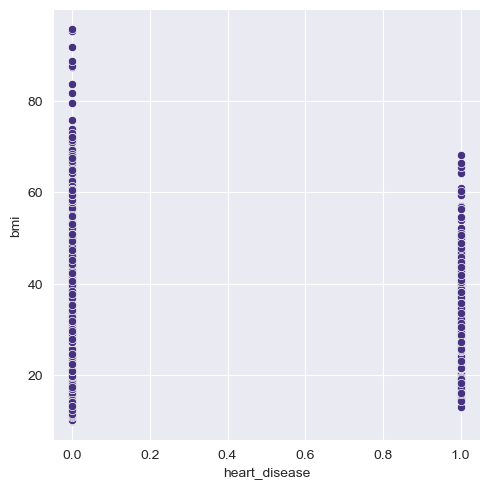

 67%|██████▋   | 6/9 [00:02<00:01,  2.36it/s]

the correlation between heart_disease and HbA1c_level is 0.06758882503325024


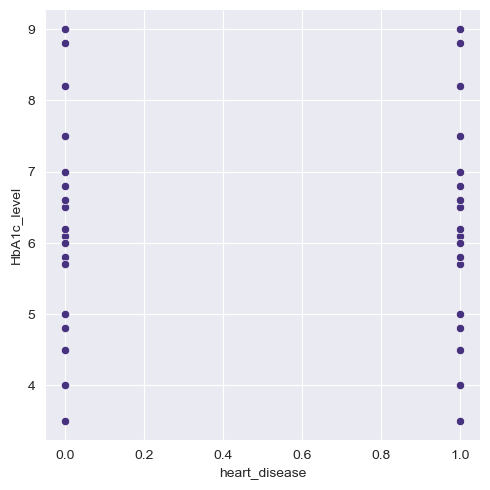

 78%|███████▊  | 7/9 [00:03<00:01,  1.79it/s]

the correlation between heart_disease and blood_glucose_level is 0.07006570638302283


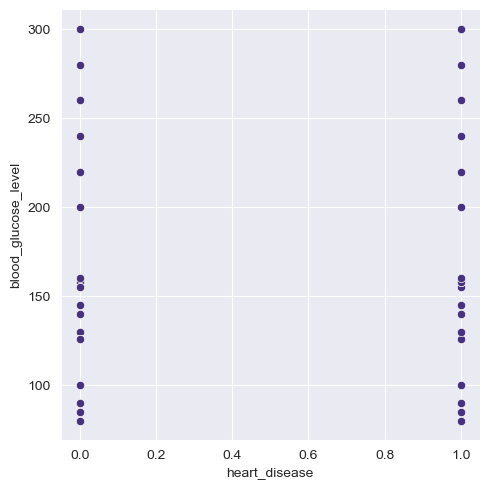

 89%|████████▉ | 8/9 [00:04<00:00,  1.41it/s]

the correlation between heart_disease and diabetes is 0.17172684954885


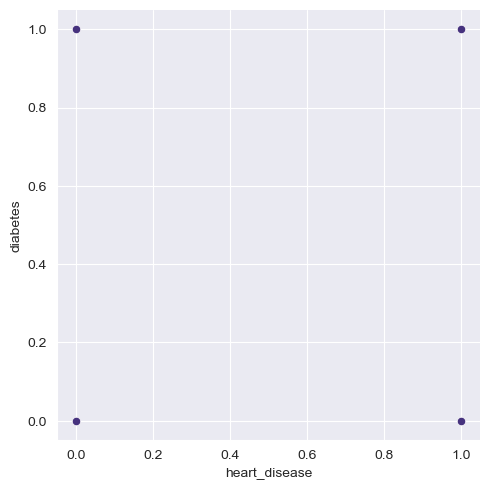

  0%|          | 0/9 [00:00<?, ?it/s]

the correlation between bmi and age is 0.33739577618617456


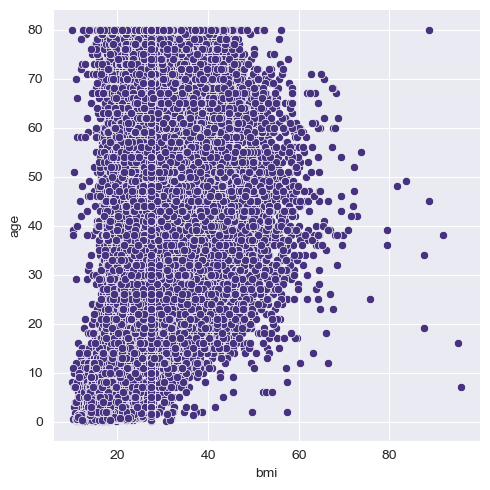

 22%|██▏       | 2/9 [00:01<00:04,  1.53it/s]

the correlation between bmi and hypertension is 0.14766567202391165


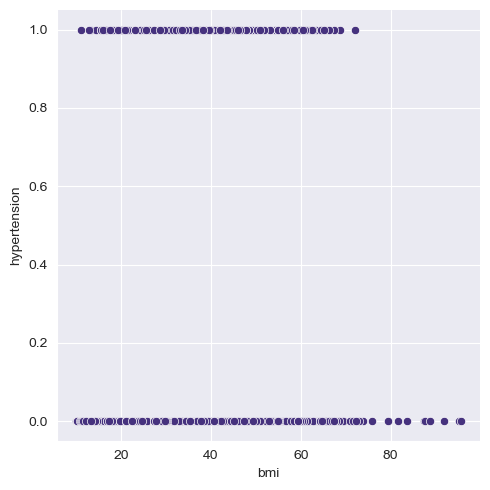

 33%|███▎      | 3/9 [00:02<00:04,  1.45it/s]

the correlation between bmi and heart_disease is 0.06119781855705118


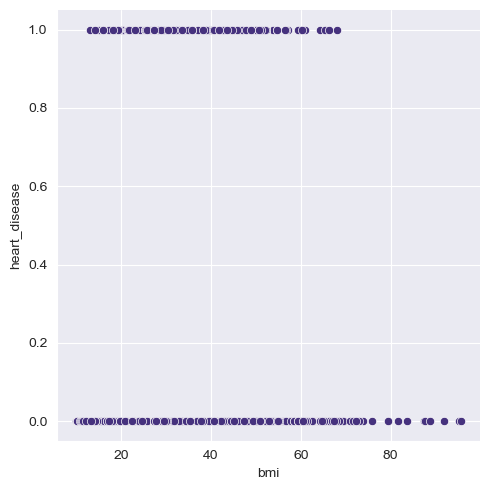

 44%|████▍     | 4/9 [00:02<00:03,  1.34it/s]

the correlation between bmi and HbA1c_level is 0.08299716118984178


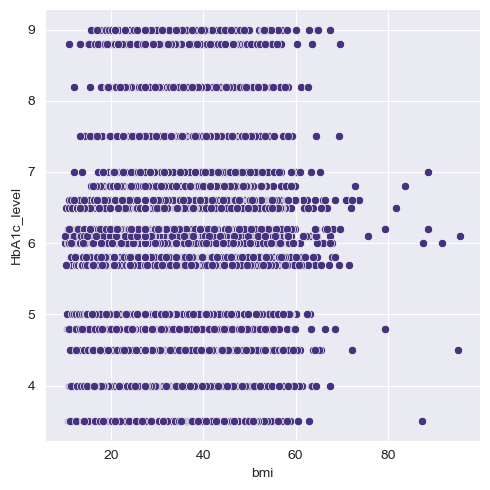

 78%|███████▊  | 7/9 [00:03<00:00,  2.16it/s]

the correlation between bmi and blood_glucose_level is 0.09126140154855847


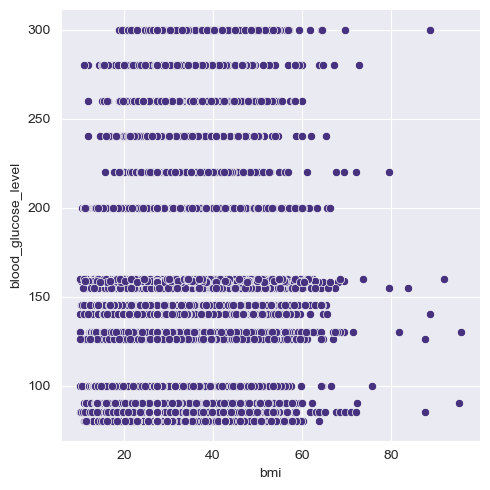

 89%|████████▉ | 8/9 [00:04<00:00,  1.74it/s]

the correlation between bmi and diabetes is 0.21435740579951057


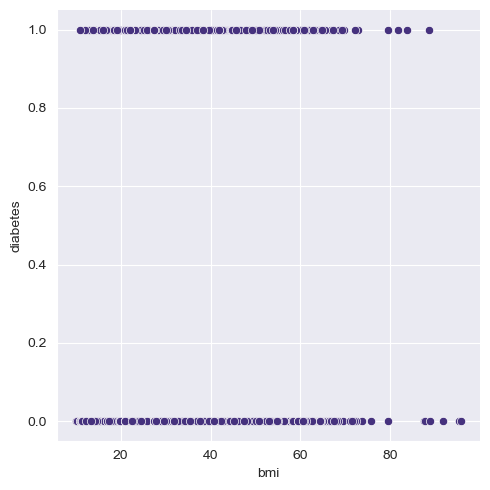

  0%|          | 0/9 [00:00<?, ?it/s]

the correlation between HbA1c_level and age is 0.10135366114510691


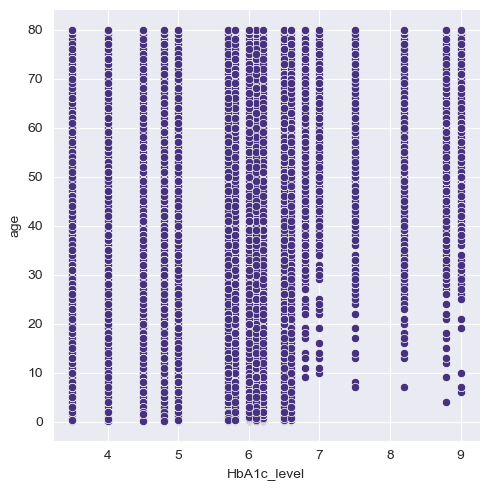

 22%|██▏       | 2/9 [00:00<00:03,  2.19it/s]

the correlation between HbA1c_level and hypertension is 0.0809387824060567


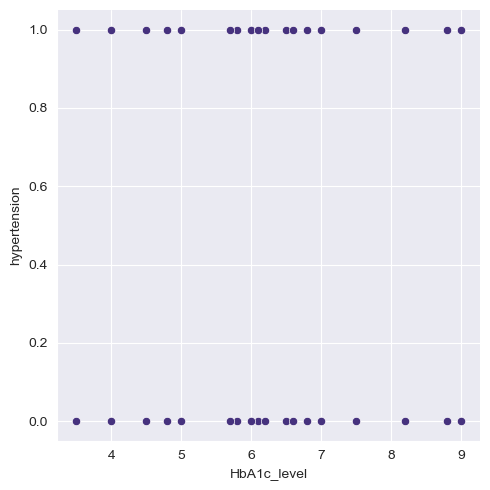

 33%|███▎      | 3/9 [00:01<00:03,  1.64it/s]

the correlation between HbA1c_level and heart_disease is 0.06758882503325024


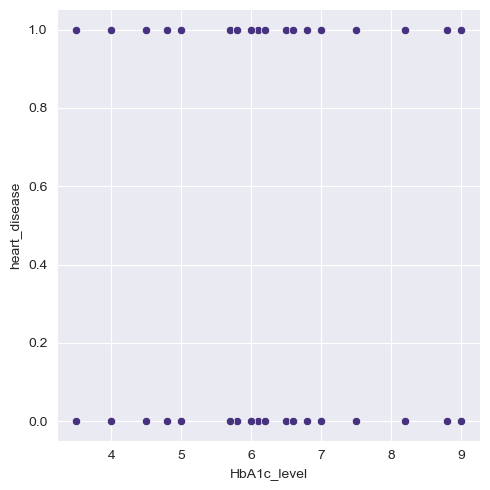

 44%|████▍     | 4/9 [00:02<00:03,  1.29it/s]

the correlation between HbA1c_level and bmi is 0.0829971611898418


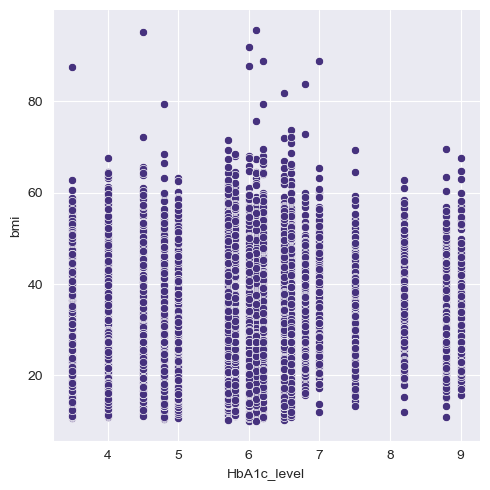

 67%|██████▋   | 6/9 [00:03<00:02,  1.49it/s]

the correlation between HbA1c_level and blood_glucose_level is 0.16673292982890425


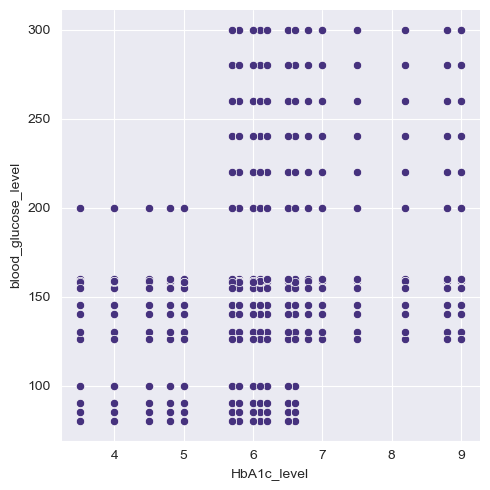

 89%|████████▉ | 8/9 [00:04<00:00,  1.72it/s]

the correlation between HbA1c_level and diabetes is 0.40066031464748897


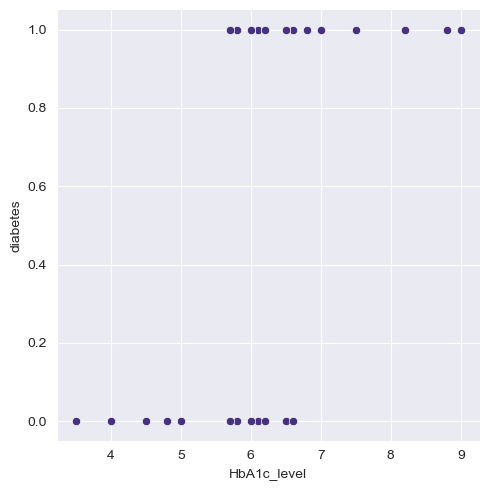

  0%|          | 0/9 [00:00<?, ?it/s]

the correlation between blood_glucose_level and age is 0.1106722675703809


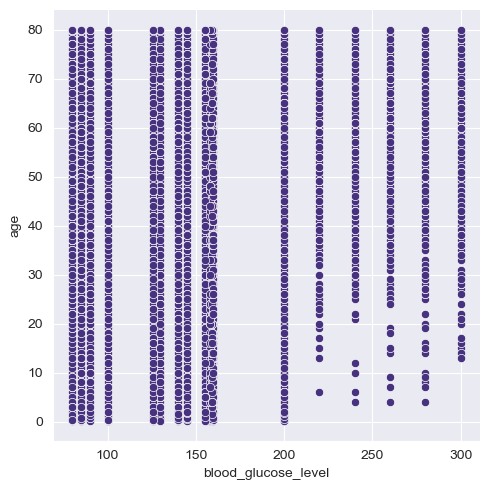

 22%|██▏       | 2/9 [00:01<00:03,  1.86it/s]

the correlation between blood_glucose_level and hypertension is 0.0844289044696364


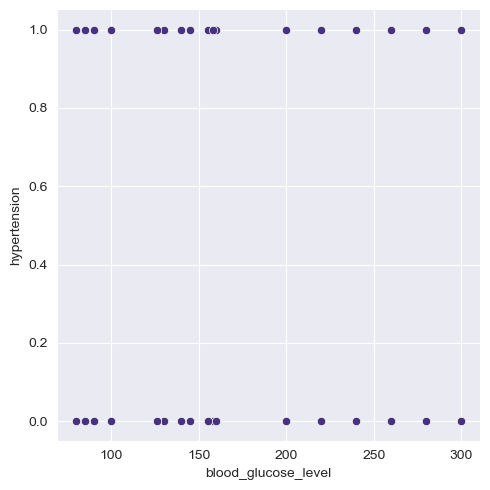

 33%|███▎      | 3/9 [00:01<00:04,  1.45it/s]

the correlation between blood_glucose_level and heart_disease is 0.07006570638302281


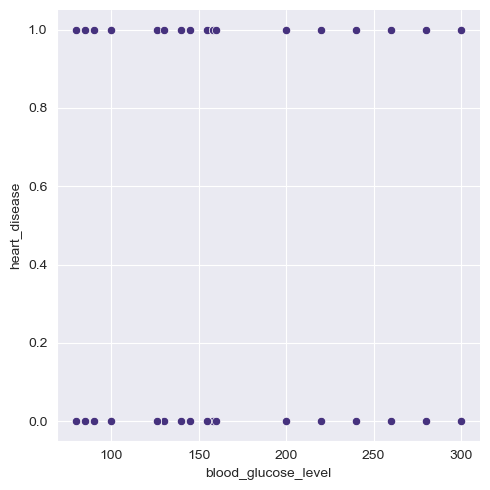

 44%|████▍     | 4/9 [00:02<00:03,  1.30it/s]

the correlation between blood_glucose_level and bmi is 0.09126140154855847


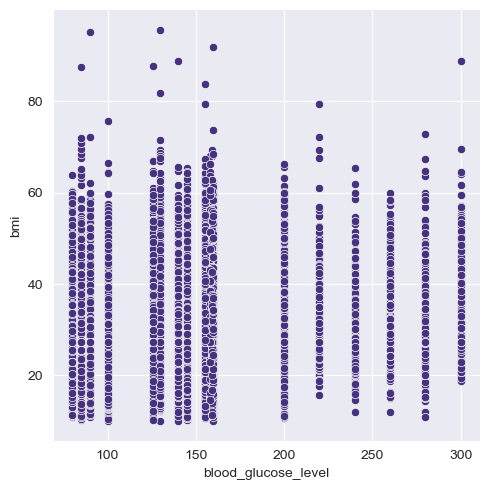

 67%|██████▋   | 6/9 [00:03<00:01,  1.64it/s]

the correlation between blood_glucose_level and HbA1c_level is 0.16673292982890425


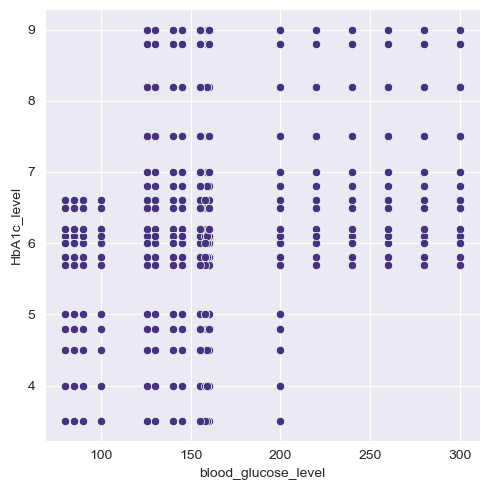

 78%|███████▊  | 7/9 [00:04<00:01,  1.43it/s]

the correlation between blood_glucose_level and diabetes is 0.4195579960205554


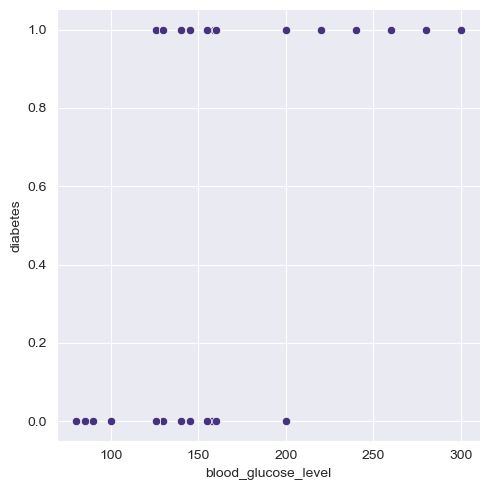

  0%|          | 0/9 [00:00<?, ?it/s]

the correlation between diabetes and age is 0.2580080333560965


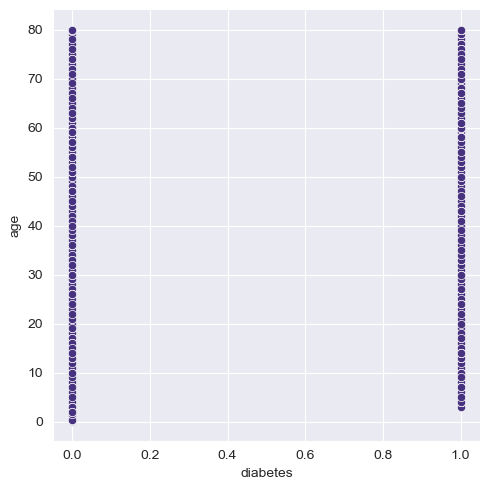

 22%|██▏       | 2/9 [00:01<00:03,  1.94it/s]

the correlation between diabetes and hypertension is 0.19782324640804932


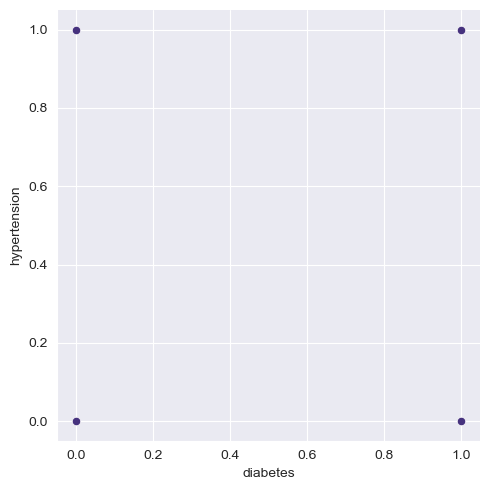

 33%|███▎      | 3/9 [00:02<00:04,  1.22it/s]

the correlation between diabetes and heart_disease is 0.17172684954885


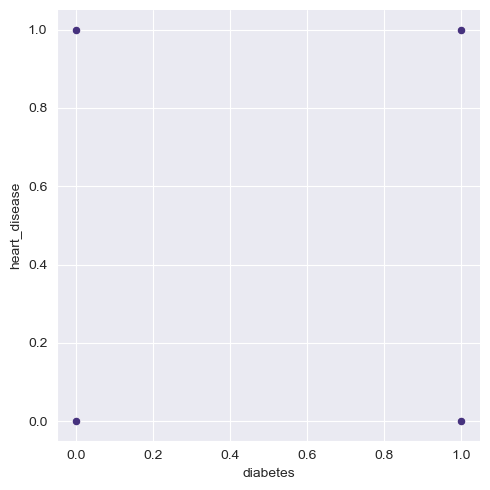

 44%|████▍     | 4/9 [00:03<00:04,  1.18it/s]

the correlation between diabetes and bmi is 0.21435740579951057


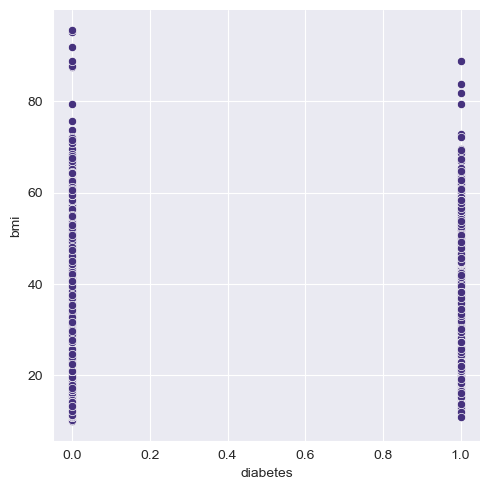

 67%|██████▋   | 6/9 [00:04<00:02,  1.30it/s]

the correlation between diabetes and HbA1c_level is 0.40066031464748897


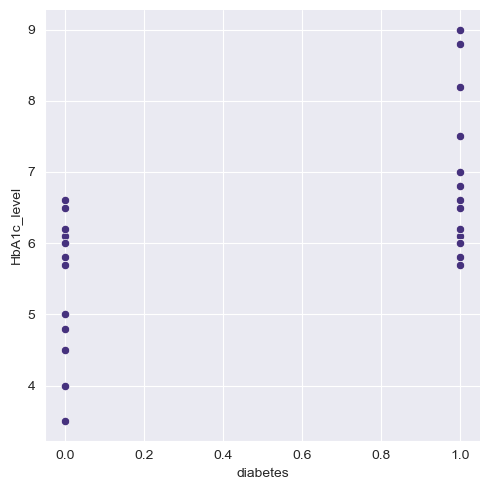

 78%|███████▊  | 7/9 [00:05<00:01,  1.21it/s]

the correlation between diabetes and blood_glucose_level is 0.4195579960205553


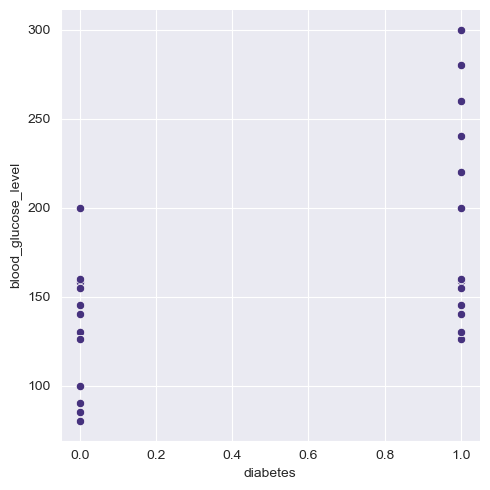

100%|██████████| 9/9 [00:06<00:00,  1.40it/s]


In [86]:
for i in (df_diabetes.columns.unique()):
    for j in tqdm(df_diabetes.columns.unique()):
        #checking the correlation
        if i != j and type(df_diabetes[i][0]) != str and type(df_diabetes[j][0]) != str:
            print(f'the correlation between {i} and {j} is {df_diabetes[i].corr(df_diabetes[j])}')
            sns.relplot(data=df_diabetes, kind='scatter', x=i, y=j)
            plt.show()

In [87]:
#TODO: Check if the grapes and the calculation of correlation is wrong

### Part 3: Estimation and hypothesis testing

In this part, you will formally test a hypothesis using your data.
1. What is the question you want to explore? Why is it interesting to you?
2. Clearly state your null hypothesis and alternative hypothesis.
3. Run a test and report the results in a comprehensive way.

### Part 4: Prediction/clustering

In this part, you will see how well you can address a classification problem or a clustering problem
using your data. Choose one of the following two options.

#### Option 1: classification
1) What do you want to try to classify? Why? What is a potential application of an algorithm that
classifies your target variable?
2) Clearly state what is the target variable (class) you are trying to predict, which variables
(features) you are using to predict the class, and why you chose these variables..
3) Use kNN for the classification task and report the results.

#### Option 2: clustering
1) Why do you want to form clusters of the data? What is a potential application of the output of
your clustering?
2) Clearly state which variables (features) you are using for clustering, and why you chose
these variables.
3) Use K-means for the clustering task and report the results.

### Part 5: Communication and reflection

Write a report summarizing your work. Your report should include the following sections:
● QUESTIONS: What are the questions you wanted to explore? Why are they interesting to
you?
● DATASET: Describe the dataset you use; Explain why it is appropriate for answering these
    questions.
● ANALYSIS & FINDINGS: What analyses did you conduct to answer your questions? What
did you find? (support with plots, but no code here). This part should summarize
everything you’ve done in parts 2-4. A person reading this should be able to
understand the questions you asked, the analysis you’ve done, and the results,
without looking at the jupyter notebook.
● LIMITATIONS: What are some limitations of your analyses and potential biases of the data
you used? How might these biases affect your findings?
● FUTURE DIRECTIONS: What new questions came up following your exploration of this
data? Describe at least one question that could not be answered using your data alone, and
specify what additional data you would collect to address it.